# Analisis exploratorio de datos

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/comentarios_mejorados.csv', sep='|')

# Mostrar las filas y columnas del DataFrame
print(df.shape)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Obtener información sobre el DataFrame
print(df.info())

# Obtener estadísticas descriptivas del DataFrame
print(df.describe())

(421, 14)
                  channelId      videoId  \
0  UCq8-iQSNsOZxIMXGeesMq8Q  elYuJAjTies   
1  UCq8-iQSNsOZxIMXGeesMq8Q  elYuJAjTies   
2  UCq8-iQSNsOZxIMXGeesMq8Q  elYuJAjTies   
3  UCq8-iQSNsOZxIMXGeesMq8Q  elYuJAjTies   
4  UCq8-iQSNsOZxIMXGeesMq8Q  elYuJAjTies   

                                         textDisplay  \
0  Me emocionaron todos los comentarios demostran...   
1  lo unico que no me gusto de ese juego es que l...   
2  Compre celeste para switch, me ayudo mucho en ...   
3  Jugue y complete la historia principal de cele...   
4              A mí me da más ansiedad de la q tengo   

                                        textOriginal       authorDisplayName  \
0  Me emocionaron todos los comentarios demostran...        @Ichbinberlinerr   
1  lo unico que no me gusto de ese juego es que l...            @luisfer3602   
2  Compre celeste para switch, me ayudo mucho en ...         @GilbertoE_3486   
3  Jugue y complete la historia principal de cele...  @lautarozakida

## 1. Elimitar columnas que no aportan informacion
En este caso se eliminan las columnas que no aportan informacion al modelo y nos quedamos con el comentario. Eliminamos también los comentarios que son respuestas a otros comentarios basandonos en el hecho de que no aportan información al modelo.

Para ello nos fijamos en el parent_id, si es nulo es un comentario raiz, si no es una respuesta a otro comentario.

In [2]:
# Contamos las filas donde el parent_id sea nulo
print(df.parentId.isnull().sum())
print(df.parentId.isnull().value_counts())

# Filtrar las filas donde el parent_id sea nulo
df = df[df.parentId.isnull()]

# Contamos las filas que quedaron
print(df.shape)


321
parentId
True     321
False    100
Name: count, dtype: int64
(321, 14)


In [3]:
columnas_a_eliminar = ['channelId', 'videoId', 'textOriginal', 'authorDisplayName', 
                       'authorProfileImageUrl', 'authorChannelUrl', 'authorChannelId', 
                       'canRate', 'viewerRating', 'likeCount', 'publishedAt', 
                       'updatedAt', 'parentId']

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

# Mostrar las primeras filas del DataFrame
print(df.head())

                                         textDisplay
0  Me emocionaron todos los comentarios demostran...
1  lo unico que no me gusto de ese juego es que l...
2  Compre celeste para switch, me ayudo mucho en ...
3  Jugue y complete la historia principal de cele...
4              A mí me da más ansiedad de la q tengo


## 2. Limpieza de texto
Se eliminan los caracteres especiales, se pasa todo a minusculas y se eliminan espaacios en blanco innecesarios. Para usar Vader vamos a dejar sin eliminar los emojis ni caracteres especiales, además de no tokenizar el texto.

In [4]:
df_vader = df.copy()

print(df_vader.head())

                                         textDisplay
0  Me emocionaron todos los comentarios demostran...
1  lo unico que no me gusto de ese juego es que l...
2  Compre celeste para switch, me ayudo mucho en ...
3  Jugue y complete la historia principal de cele...
4              A mí me da más ansiedad de la q tengo


In [5]:
import re

# Función para limpiar el texto
def clean_text(text):
    # Eliminar emojis y caracteres especiales manteniendo las tildes y ñ
    text = re.sub(r'([^\s\wñáéíóú]|_)+', '', text)
    
    # Minúsculas
    text = text.lower()
    
    # Eliminar espacios en blanco innecesarios
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Aplicar la función de limpieza de texto a la columna 'textDisplay'
df['textDisplay'] = df['textDisplay'].apply(clean_text)

# Mostrar las primeras filas del DataFrame
print(df.head())

                                         textDisplay
0  me emocionaron todos los comentarios demostran...
1  lo unico que no me gusto de ese juego es que l...
2  compre celeste para switch me ayudo mucho en u...
3  jugue y complete la historia principal de cele...
4              a mí me da más ansiedad de la q tengo


## 3. Tokenizacion
Se separa el texto en palabras individuales. Esto nos permite analizar cada palabra por separado y no como una cadena de texto.


In [6]:
import nltk
# Descargar el paquete 'punkt' de NLTK solo es necesario la primera vez
nltk.download('punkt')

# Tokenizar el texto
df['textDisplay'] = df['textDisplay'].apply(nltk.word_tokenize)

print(df.head())


                                         textDisplay
0  [me, emocionaron, todos, los, comentarios, dem...
1  [lo, unico, que, no, me, gusto, de, ese, juego...
2  [compre, celeste, para, switch, me, ayudo, muc...
3  [jugue, y, complete, la, historia, principal, ...
4   [a, mí, me, da, más, ansiedad, de, la, q, tengo]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 4. Eliminacion de stopwords
Se eliminan las palabras que no aportan informacion al modelo. Estas palabras son las que se encuentran en la lista de stopwords como por ejemplo: "el", "la", "de", etc.

In [7]:
# Eliminar las palabras vacías
from nltk.corpus import stopwords
# Descargar las palabras vacías de NLTK solo es necesario la primera vez
nltk.download('stopwords')
stopwords = stopwords.words('spanish')

# Función para eliminar las palabras vacías
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

# Eliminar las palabras vacías
df['textDisplay'] = df['textDisplay'].apply(remove_stopwords)

print(df.head())

                                         textDisplay
0  [emocionaron, comentarios, demostrando, tanta,...
1  [unico, gusto, juego, persona, creadora, juego...
2  [compre, celeste, switch, ayudo, momento, teni...
3  [jugue, complete, historia, principal, celeste...
4                                  [da, ansiedad, q]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 5. Stemming o lematizacion
Se eliminan los sufijos de las palabras para quedarnos con la raiz de la palabra. Esto nos permite reducir el numero de palabras que se tienen que analizar. Por ejemplo: "corriendo" se convierte en "correr". 

Esto es útil en análisis de sentimientos ya que la raíz de la palabra puede ser más importante que la palabra en sí. Por ejemplo, "bueno" y "mejor" tienen la misma raíz, "buen", por lo que se puede decir que son similares.

Para lematizar se utiliza la libreria de Spacy, ya que ntltk no tiene soporte para el idioma español.

En nuestro caso instalaremos una versión precompilada de Spacy para el idioma español, ya que la compilación de la libreria puede tardar mucho tiempo.

" python -m spacy download es_core_news_sm "

In [8]:
import spacy

# Cargar el modelo de lenguaje español de Spacy
nlp = spacy.load('es_core_news_sm')

# Función para lematizar el texto
def lemmatization(texts):
    output = []
    changed_words = []
    for text in texts:
        # Crear una lista de palabras antes de la lematización
        words_before = text
        
        # Lematizar el texto
        doc = nlp(" ".join(words_before)) 
        words_after = [token.lemma_ for token in doc]
        
        # Comparar las palabras antes y después de la lematización
        for before, after in zip(words_before, words_after):
            if before != after:
                changed_words.append((before, after))
        
        output.append(words_after)
    
    print("Palabras que han cambiado después de la lematización:")
    for before, after in changed_words[:5]:
        print(f"{before} -> {after}")
    
    return output

# Lematizar el texto
df['textDisplay'] = lemmatization(df['textDisplay'])

Palabras que han cambiado después de la lematización:
emocionaron -> emocionar
comentarios -> comentario
demostrando -> demostrar
tanta -> tanto
muchas -> mucho


In [9]:
print(df.head())

                                         textDisplay
0  [emocionar, comentario, demostrar, tanto, vuln...
1  [unico, gusto, juego, persona, creador, juego,...
2  [compre, celeste, switch, ayudo, momento, teni...
3  [jugue, completir, historia, principal, celest...
4                                 [dar, ansiedad, q]


# Textblob para asignar polaridad y subjetividad a los comentarios positivos, negativos y neutros
Con Textblob podemos asignar una polaridad y subjetividad a cada comentario, de esta forma podemos analizar los comentarios positivos, negativos y neutros y etiquetarlos como tal.

Posteriormente, este dataset ya etiquetado por textblob se utilizará para entrenar un modelo de clasificación propio y compararlo con la etiquetación manual de otro dataset.

In [10]:
from textblob import TextBlob

def classify_comments(comments):
    classifications = []
    for comment in comments:
        # Unir las palabras en una cadena si el comentario es una lista
        if isinstance(comment, list):
            comment = ' '.join(comment)

        # Crear un TextBlob con el comentario
        blob = TextBlob(comment)

        # Obtener la puntuación de polaridad
        polarity = blob.sentiment.polarity
        
        # Clasificar el comentario
        if polarity < -0.5:
            classification = 2  # negativo
        elif -0.5 <= polarity < 0.5:
            classification = 1  # neutral
        else:
            classification = 0  # positivo

        classifications.append(classification)
    
    return classifications

# Clasificar los comentarios
df['classification_textblob'] = classify_comments(df['textDisplay'])

In [11]:
print(df.head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('../data/comentarios_clasificados.csv', index=False, sep='|')

                                         textDisplay  classification_textblob
0  [emocionar, comentario, demostrar, tanto, vuln...                        1
1  [unico, gusto, juego, persona, creador, juego,...                        1
2  [compre, celeste, switch, ayudo, momento, teni...                        1
3  [jugue, completir, historia, principal, celest...                        1
4                                 [dar, ansiedad, q]                        1


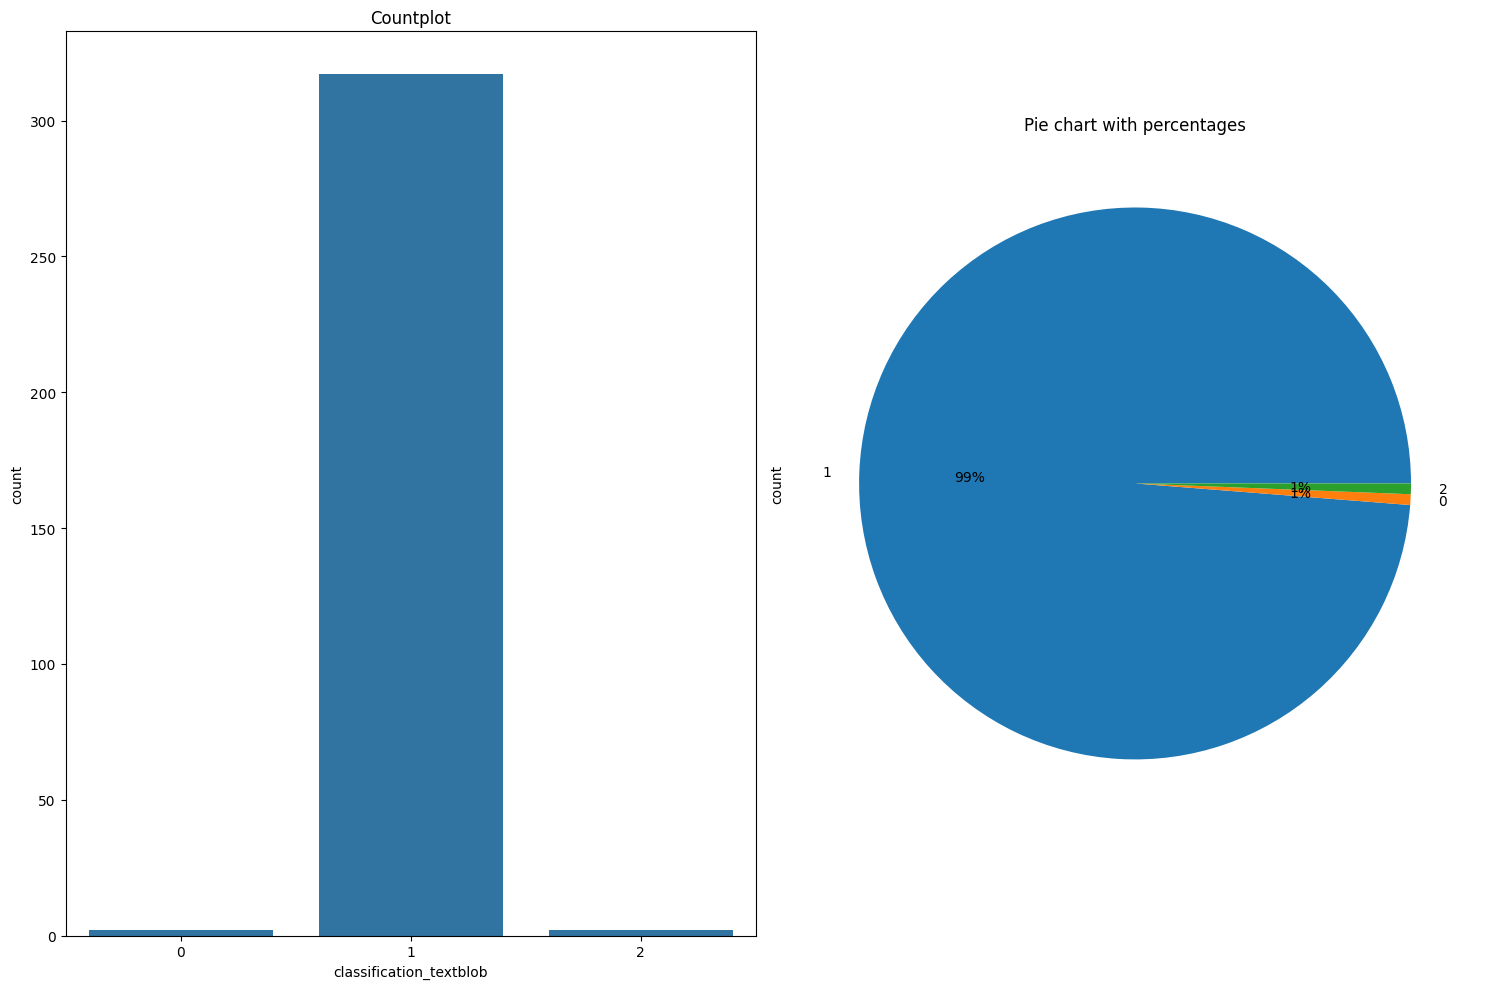

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 2 subtramas
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Mostrar la cantidad de comentarios por clasificación en la primera subtrama
sns.countplot(x='classification_textblob', data=df, ax=axs[0])
axs[0].set_title('Countplot')

# Mostrar la cantidad de comentarios por clasificación en la segunda subtrama
df['classification_textblob'].value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1])
axs[1].set_title('Pie chart with percentages')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

plt.show()

# Vader para asignar polaridad y subjetividad a los comentarios positivos, negativos y neutros
Para comparar los resultados de Textblob, utilizaremos Vader para asignar una polaridad y subjetividad a cada comentario.

In [13]:
# import nltk
# nltk.download('vader_lexicon')

In [14]:
print(df.head())

                                         textDisplay  classification_textblob
0  [emocionar, comentario, demostrar, tanto, vuln...                        1
1  [unico, gusto, juego, persona, creador, juego,...                        1
2  [compre, celeste, switch, ayudo, momento, teni...                        1
3  [jugue, completir, historia, principal, celest...                        1
4                                 [dar, ansiedad, q]                        1


In [15]:
# # Convertir las listas de palabras en strings
# df['textDisplay'] = df['textDisplay'].apply(' '.join)

In [16]:
# Imprimir los tipos de datos de las columnas
print(df_vader.dtypes)

textDisplay    object
dtype: object


In [17]:
print(df_vader.head())

                                         textDisplay
0  Me emocionaron todos los comentarios demostran...
1  lo unico que no me gusto de ese juego es que l...
2  Compre celeste para switch, me ayudo mucho en ...
3  Jugue y complete la historia principal de cele...
4              A mí me da más ansiedad de la q tengo


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

def safe_polarity_scores(comment):
    try:
        return sia.polarity_scores(comment)
    except IndexError:
        print(f"Error with comment: {comment}")
        return None

df_vader['vader_scores'] = df_vader['textDisplay'].apply(safe_polarity_scores)

# Eliminar las filas que contienen None en la columna 'vader_scores'
df_vader = df_vader.dropna(subset=['vader_scores'])

# # Extraer la puntuación compuesta, que es una puntuación de sentimiento general que combina las puntuaciones de sentimiento positivo, negativo y neutral
df_vader['vader_compound'] = df_vader['vader_scores'].apply(lambda scores: scores['compound'])

# # # Clasificar los comentarios en base a la puntuación compuesta
# df_vader['vader_classification'] = df_vader['vader_compound'].apply(lambda score: 2 if score < -0.5 else 1 if -0.5 <= score < 0.5 else 0)

In [19]:
print(df_vader.head())

                                         textDisplay  \
0  Me emocionaron todos los comentarios demostran...   
1  lo unico que no me gusto de ese juego es que l...   
2  Compre celeste para switch, me ayudo mucho en ...   
3  Jugue y complete la historia principal de cele...   
4              A mí me da más ansiedad de la q tengo   

                                        vader_scores  vader_compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
1  {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...         -0.2960  
2  {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'comp...          0.3612  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  


In [20]:
# # Analisis visual de los resultados de Vader
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Crear una figura con 2 subtramas
# fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# # Mostrar la cantidad de comentarios por clasificación en la primera subtrama
# sns.countplot(x='vader_classification', data=df_vader, ax=axs[0])
# axs[0].set_title('Countplot')

# # Mostrar la cantidad de comentarios por clasificación en la segunda subtrama
# df_vader['vader_classification'].value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1])
# axs[1].set_title('Pie chart with percentages')

# # Ajustar el espacio entre las subtramas
# plt.tight_layout()

# plt.show()

Este código crea varias nuevas columnas en el DataFrame. 'vader_scores' es una columna de diccionarios que contienen las puntuaciones de sentimiento VADER para cada comentario. 'vader_compound' es una columna de las puntuaciones compuestas, que son una combinación de las puntuaciones de sentimiento positivo, negativo y neutral. 'vader_classification' es una columna de clasificaciones de sentimiento basadas en las puntuaciones compuestas, donde '2' indica un sentimiento negativo, '1' indica un sentimiento neutral y '0' indica un sentimiento positivo.

# Diferencias entre Textblob y Vader
TextBlob y VADER son dos bibliotecas populares para el análisis de sentimientos en Python, pero tienen enfoques diferentes y pueden ser más adecuadas para diferentes tipos de texto.

**TextBlob** utiliza un enfoque basado en léxico para el análisis de sentimientos. Esto significa que tiene una lista predefinida de palabras, cada una de las cuales tiene una puntuación de sentimiento asociada que varía de -1 (muy negativa) a 1 (muy positiva). TextBlob simplemente suma las puntuaciones de todas las palabras en un texto para obtener una puntuación de sentimiento total. Este enfoque es simple y rápido, pero puede no capturar con precisión el sentimiento de textos más complejos, especialmente aquellos que usan sarcasmo, doble sentido o jerga.

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) también es un enfoque basado en léxico, pero es más sofisticado que TextBlob. VADER no solo tiene una lista de palabras con puntuaciones de sentimiento, sino que también tiene reglas gramaticales y sintácticas específicas para manejar cosas como intensificadores (por ejemplo, "muy" en "muy bueno"), connotaciones (por ejemplo, "no" en "no bueno"), emoticonos, acrónimos y jerga. Esto hace que VADER sea especialmente bueno para analizar el sentimiento en las redes sociales y otros textos informales.

Dado que estamos analizando comentarios de YouTube, que son textos informales, VADER es probablemente una mejor opción que TextBlob.

## Eleccion de umbral para clasificar los comentarios como positivos, negativos o neutros
Para el análisis exploratorio de los datos, podrías utilizar un histograma para visualizar la distribución de las puntuaciones de polaridad de Vader. Esto te permitirá ver dónde se encuentran la mayoría de las puntuaciones y podría ayudarte a elegir un umbral adecuado.


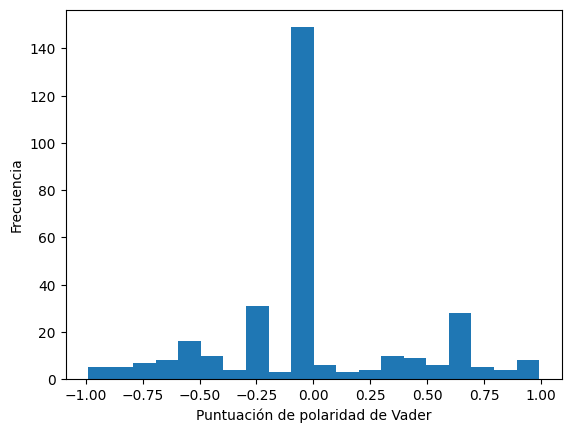

In [21]:
import matplotlib.pyplot as plt

# Crear un histograma de las puntuaciones de polaridad
plt.hist(df_vader['vader_compound'], bins=20)
plt.xlabel('Puntuación de polaridad de Vader')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
df_vader['vader_classification'] = df_vader['vader_compound'].apply(lambda score: 1 if score < 0.0 else 0 if 0.0 <= score <= 0 else 2)

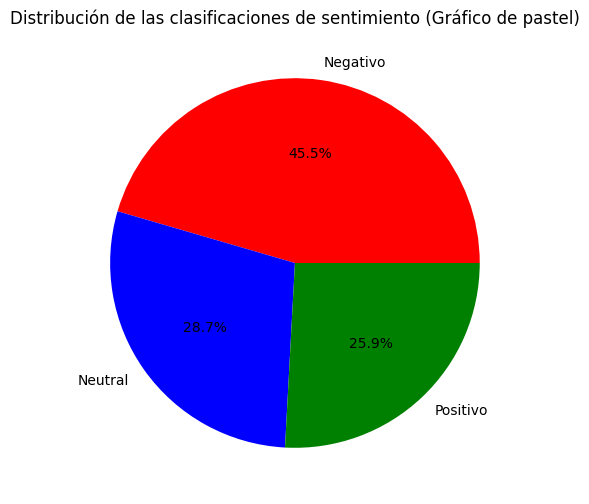

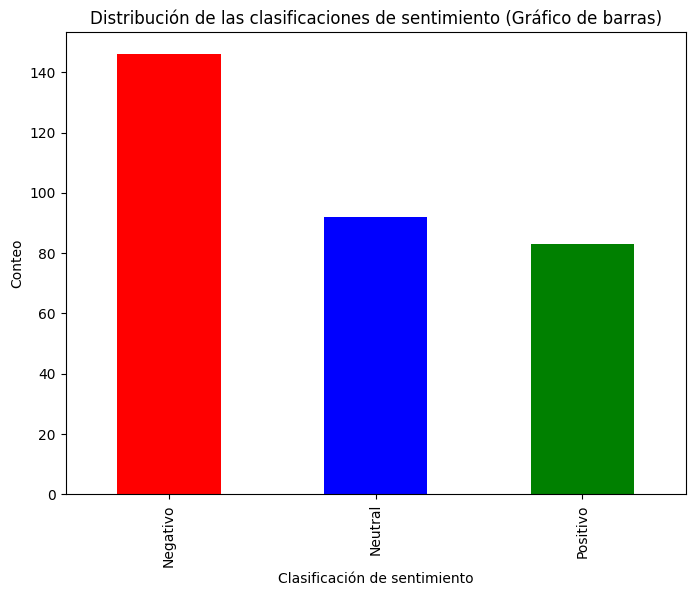

In [23]:
import matplotlib.pyplot as plt

# Calcular los conteos de cada clasificación
clasificaciones = df_vader['vader_classification'].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(6,6))
plt.pie(clasificaciones, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title('Distribución de las clasificaciones de sentimiento (Gráfico de pastel)')
plt.show()

# Crear la gráfica de barras
plt.figure(figsize=(8,6))
clasificaciones.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Clasificación de sentimiento')
plt.ylabel('Conteo')
plt.title('Distribución de las clasificaciones de sentimiento (Gráfico de barras)')
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])
plt.show()

In [33]:
# Print de comentarios neutrales, que son los que estan con 0 despues de la clasificacion
df_vader[df_vader.vader_classification == 1]



,textDisplay,vader_scores,vader_compound,vader_classification
1,lo unico que no me gusto de ese juego es que l...,"{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...",-0.2960,1
10,Este juego me ayudo a entender algunas cosas.....,"{'neg': 0.084, 'neu': 0.863, 'pos': 0.053, 'co...",-0.1027,1
13,Sin duda un video bastante completo que deja s...,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",-0.9371,1
14,"Joder, lamentablemente empecé con estás crisis...","{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'comp...",-0.6249,1
18,"Q hermoso juego, en su momento me encantó por ...","{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",-0.5707,1
...,...,...,...,...
361,"Hola, primero un saludo para tu grandioso cont...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",-0.7783,1
370,Yo luego de quedarme calvo tras intentar conse...,"{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...",-0.2960,1
373,Y al final no entendí como superar la ansiedad 😢,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'comp...",-0.6486,1
374,"Hermano, muchas gracias, sufro mucho de ansied...","{'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'comp...",-0.7783,1


In [29]:
df_vader.iloc[18]['textDisplay']

'hace años jugue al Celeste, no llegue al interior de la montaña y deje el juego por ninguna razon en especifico. En ese entonces yo no tenia el criterio suficiente como para darme cuenta de lo que el juego me queria contar, gracias a tu video me doy cuenta de que debo darle otra oportunidad a este juegazo. Es increiblemente complicado, pero si puedo con el, puedo con todo'

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un objeto SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Texto a analizar
texto = "Q hermoso juego, en su momento me encantó por lo desafiante q me resulto... Hoy, lo estoy x terminar nuevamente, pero no lo juego x lo desafiante, si no xq me hace sentir comprendido en esta etapa de mi vida q estoy intentando atravesar. Un juego maravilloso!"

# Calcular las puntuaciones de sentimiento
puntuaciones = analyzer.polarity_scores(texto)

print(puntuaciones)

{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'compound': -0.5707}


In [25]:
# Print de comentarios negativos, que son los que estan con 2 despues de la clasificacion
print(df_vader[df_vader.vader_classification == 2].textDisplay.head(10))

2     Compre celeste para switch, me ayudo mucho en ...
5     Celeste llego en el momento que mas lo necesit...
12                JAJAJAJAJAJ preguntenle a farewell XD
16    Suena muy, muy interesando. Hiciste una descri...
21    Morí 3268 veces haciendo farewell, fue toda un...
24                                                    😊
25    Wao... no imaginé que el video sería así... no...
32        Vaya, me dejaste con un nudo en la garganta ❤
44    Lol Si no hay mas ansiedad que la que se sient...
49             A mi no me ha solucionado la ansiedad xd
Name: textDisplay, dtype: object


In [ ]:
# Print de comentarios positivos, que son los que estan con 0 despues de la clasificacion
print(df_vader[df_vader.vader_classification == 0].textDisplay.head(10))

In [ ]:
# mostrar los comentarios positivos segun vader_compound

print(df_vader[df_vader.vader_compound > 0.0].textDisplay.head(10))

In [ ]:
positive_comments_count = df_vader[df_vader['vader_compound'] == 0]['vader_compound'].count()
print("Count of positive comments:", positive_comments_count)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

# Usa tus datos reales
sentiment_intensity = df_vader['vader_scores'].apply(lambda scores: scores['compound']).values
polarity_score = df_vader['vader_compound'].values

# Trazar la puntuación de polaridad en función de la intensidad del sentimiento
plt.plot(sentiment_intensity, polarity_score, 'o-')
plt.xlabel('Intensidad del sentimiento')
plt.ylabel('Puntuación de polaridad')
plt.title('Relación entre la intensidad del sentimiento y la puntuación de polaridad')

# Identificar el punto de inflexión
knee_locator = KneeLocator(sentiment_intensity, polarity_score, curve='convex', direction='decreasing')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.show()

print(f"El umbral de polaridad para el punto de inflexión es: {knee_locator.knee}")

In [ ]:
umbral = knee_locator.knee

print(umbral)

In [ ]:
# Asignamos un 1 si el comentario es menor que el umbral, 0 si es mayor y 2 si es igual

In [ ]:
df_vader['classification_threshold'] = df_vader['vader_compound'].apply(lambda score: 1 if score < umbral else 0 if umbral <= score <= 0 else 2)

In [ ]:
import matplotlib.pyplot as plt

# Calcular los porcentajes de cada clasificación
clasificaciones1 = df_vader['vader_classification'].value_counts(normalize=True)
clasificaciones2 = df_vader['classification_threshold'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Crear la primera gráfica de pastel
axs[0].pie(clasificaciones1, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%')
axs[0].set_title('Clasificación con umbral de -0.3')

# Crear la segunda gráfica de pastel
axs[1].pie(clasificaciones2, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%')
axs[1].set_title('Clasificación con umbral de -0.4874')

# Mostrar las gráficas
plt.show()

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un objeto de análisis de sentimientos
vader = SentimentIntensityAnalyzer()

# Aplicar Vader a los comentarios y obtener la puntuación de polaridad
df_vader["vader_compound"] = df_vader["textDisplay"].apply(lambda x: vader.polarity_scores(x)["compound"])

# Calcular la intensidad del sentimiento como el valor absoluto de la puntuación de polaridad
df_vader["sentiment_intensity"] = df_vader["vader_compound"].abs()

# Ordenar el dataframe por la intensidad del sentimiento
df_vader = df_vader.sort_values(by="sentiment_intensity")

# Graficar la relación entre la intensidad del sentimiento y la puntuación de polaridad
plt.plot(df_vader["sentiment_intensity"], df_vader["vader_compound"], color="blue")
plt.xlabel("Intensidad del sentimiento")
plt.ylabel("Puntuación de polaridad")
plt.title("Relación entre la intensidad del sentimiento y la puntuación de polaridad")

# Marcar el punto de inflexión con una línea vertical
plt.axvline(x=-0.4874, color="red", linestyle="--")
plt.show()


In [ ]:
df_vader